In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
df_proto_cp_result = pd.read_csv('../result_summary/protonet_cp_result_summary.csv')
df_proto_cp_plus_result = pd.read_csv('../result_summary/protonet_cp+_result_summary.csv')
df_multitask_cp_plus_result = pd.read_csv('../result_summary/multitask_cp+_result_summary.csv')

df_proto_img_result = pd.read_csv('../result_summary/protonet_img_result_summary.csv')
df_cloome_img_result = pd.read_csv('../result_summary/cloome_img_result_summary.csv')

In [24]:
proto_img_after_16 = np.array([float(df_proto_img_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_32 = np.array([float(df_proto_img_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_64 = np.array([float(df_proto_img_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_96 = np.array([float(df_proto_img_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])

proto_cp_after_16 = np.array([float(df_proto_cp_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_32 = np.array([float(df_proto_cp_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_64 = np.array([float(df_proto_cp_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_96 = np.array([float(df_proto_cp_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])

proto_cp_plus_after_16 = np.array([float(df_proto_cp_plus_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_plus_result))])
proto_cp_plus_after_32 = np.array([float(df_proto_cp_plus_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_plus_result))])
proto_cp_plus_after_64 = np.array([float(df_proto_cp_plus_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_plus_result))])
proto_cp_plus_after_96 = np.array([float(df_proto_cp_plus_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_plus_result))])

cloome_img_16 = np.array([float(df_cloome_img_result['16'][i].split('+/-')[0]) for i in range(len(df_cloome_img_result))])
cloome_img_32 = np.array([float(df_cloome_img_result['32'][i].split('+/-')[0]) for i in range(len(df_cloome_img_result))])
cloome_img_64 = np.array([float(df_cloome_img_result['64'][i].split('+/-')[0]) for i in range(len(df_cloome_img_result))])
cloome_img_96 = np.array([float(df_cloome_img_result['96'][i].split('+/-')[0]) for i in range(len(df_cloome_img_result))])

multitask_cp_plus_16 = np.array([float(df_multitask_cp_plus_result['16'][i].split('+/-')[0]) for i in range(len(df_multitask_cp_plus_result))])
multitask_cp_plus_32 = np.array([float(df_multitask_cp_plus_result['32'][i].split('+/-')[0]) for i in range(len(df_multitask_cp_plus_result))])
multitask_cp_plus_64 = np.array([float(df_multitask_cp_plus_result['64'][i].split('+/-')[0]) for i in range(len(df_multitask_cp_plus_result))])
multitask_cp_plus_96 = np.array([float(df_multitask_cp_plus_result['96'][i].split('+/-')[0]) for i in range(len(df_multitask_cp_plus_result))])

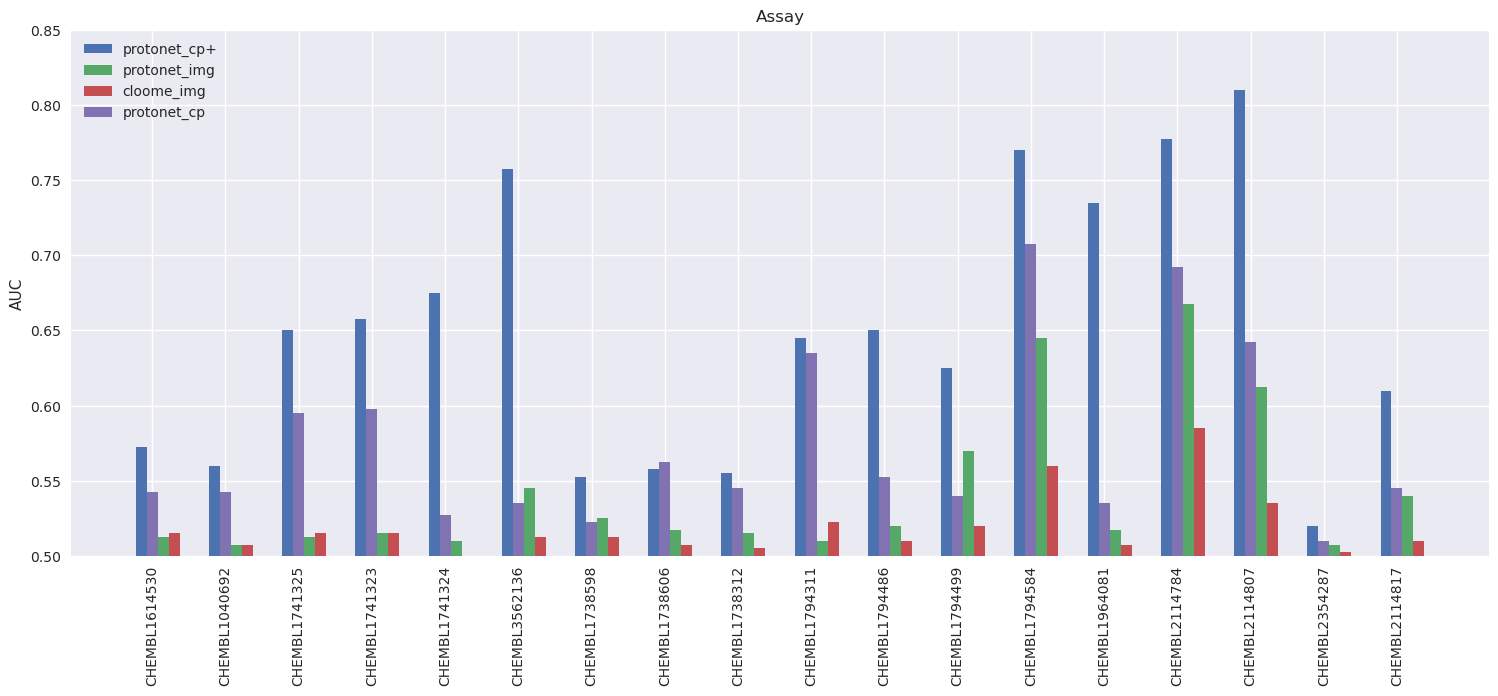

In [25]:
# Improvements for each assay
avg_proto_cp = np.mean([proto_cp_after_16, proto_cp_after_32, proto_cp_after_64, proto_cp_after_96], axis=0)
avg_proto_cp_plus = np.mean([proto_cp_plus_after_16, proto_cp_plus_after_32, proto_cp_plus_after_64, proto_cp_plus_after_96], axis=0)
avg_proto_img = np.mean([proto_img_after_16, proto_img_after_32, proto_img_after_64, proto_img_after_96], axis=0)
avg_cloome_img = np.mean([cloome_img_16, cloome_img_32, cloome_img_64, cloome_img_96], axis=0)
avg_multitask_img = np.mean([multitask_cp_plus_16, multitask_cp_plus_32, multitask_cp_plus_64, multitask_cp_plus_96], axis=0)
labels = list(df_proto_cp_result['assay_chembl_id'])

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    rects1 = ax.bar(x - width, avg_proto_cp_plus, width, label='protonet_cp+')
    #rects4 = ax.bar(x, avg_multitask_img, width, label='multitask_cp+')
    rects2 = ax.bar(x + width, avg_proto_img, width, label='protonet_img')
    rects3 = ax.bar(x + 2*width, avg_cloome_img, width, label='cloome_img')
    rects5 = ax.bar(x, avg_proto_cp, width, label='protonet_cp')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUC')
    ax.set_title('Assay')
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.tick_params(axis='x', labelrotation=90)

    plt.ylim([0.5, 0.85])
    plt.savefig("../plots/Model_comparison_barplot2.png")
    plt.show()

In [26]:
# Best performing:
### CHEMBL3562136: PubChem BioAssay. qHTS Assay for Identifying Compounds that block Entry of Ebola Virus, Screen 2 blue channel. 
### CHEMBL2114807: PubChem BioAssay. qHTS Assay to Identify Small Molecule Activators of BRCA1 Expression.
### CHEMBL2114784: PubChem BioAssay. qHTS for Inhibitors of ATXN expression.
### CHEMBL1964081: PUBCHEM_BIOASSAY: S16 Schwann cell PMP22 intronic element firefly luciferase assay.
### CHEMBL1794584: PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b

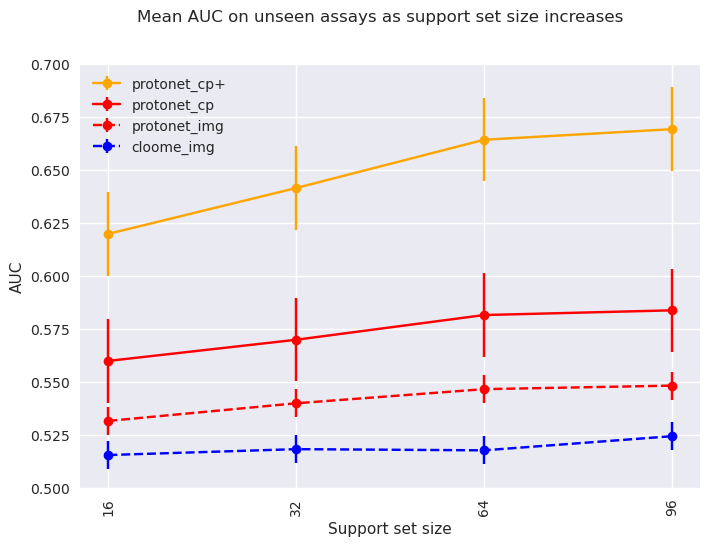

In [27]:
avg_protonet_cp_plus = [np.mean(proto_cp_plus_after_16), np.mean(proto_cp_plus_after_32), np.mean(proto_cp_plus_after_64), np.mean(proto_cp_plus_after_96)]
avg_protonet_cp = [np.mean(proto_cp_after_16), np.mean(proto_cp_after_32), np.mean(proto_cp_after_64), np.mean(proto_cp_after_96)]
avg_protonet_img = [np.mean(proto_img_after_16), np.mean(proto_img_after_32), np.mean(proto_img_after_64), np.mean(proto_img_after_96)]
avg_cloome_img = [np.mean(cloome_img_16), np.mean(cloome_img_32), np.mean(cloome_img_64), np.mean(cloome_img_96)]
avg_multitask_cp_plus = [np.mean(multitask_cp_plus_16), np.mean(multitask_cp_plus_32), np.mean(multitask_cp_plus_64), np.mean(multitask_cp_plus_96)]

labels = ['16', '32', '64', '96']

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    plt.errorbar(labels, avg_protonet_cp_plus, yerr=np.std(avg_protonet_cp_plus), color='orange', label='protonet_cp+', marker='o')
    #plt.errorbar(labels, avg_multitask_cp_plus, yerr=np.std(avg_multitask_cp_plus), color='green', label='multitask_cp+', marker='o')
    plt.errorbar(labels, avg_protonet_cp, yerr=np.std(avg_protonet_cp_plus), color='red', label='protonet_cp', marker='o')
    plt.errorbar(labels, avg_protonet_img, yerr=np.std(avg_protonet_img), color='red', linestyle='dashed', label='protonet_img', marker='o')
    plt.errorbar(labels, avg_cloome_img, yerr=np.std(avg_protonet_img), color='blue', linestyle='dashed', label='cloome_img', marker='o')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('AUC')
    plt.xlabel('Support set size')
    plt.suptitle('Mean AUC on unseen assays as support set size increases')
    #plt.xticks([])
    plt.legend(loc='upper left')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.tick_params(axis='x', labelrotation=90)

    plt.ylim([0.5, 0.70])
    plt.savefig("../plots/Model_comparison_lineplot2.png")
    plt.show()

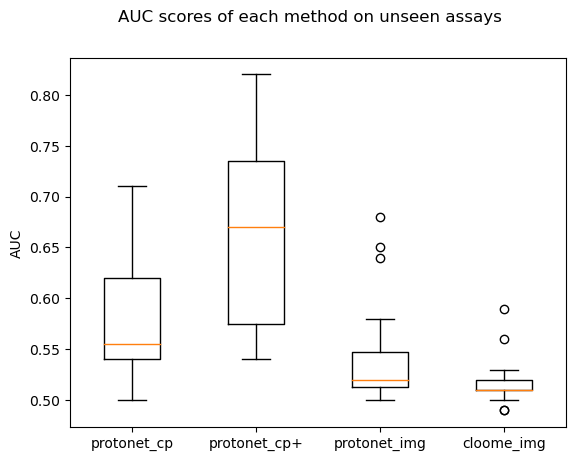

In [28]:
data = [proto_cp_after_64, proto_cp_plus_after_64, proto_img_after_64, cloome_img_64]
#data = [multitask_cp_plus_64, proto_cp_plus_after_64, proto_img_after_64, cloome_img_64]

plt.boxplot(data)
plt.ylabel('AUC')
plt.suptitle('AUC scores of each method on unseen assays')
#plt.xticks([1,2,3,4], ['multitask_cp+', 'protonet_cp+', 'protonet_img', 'cloome_img'])
plt.xticks([1,2,3,4], ['protonet_cp', 'protonet_cp+', 'protonet_img', 'cloome_img'])
plt.savefig("../plots/Model_comparison_boxplot2.png")
plt.show()